### ok Now lets start analysis lets import the data 

In [1]:
import pandas as pa
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df=pa.read_csv('clean_data')

In [3]:
del df['Unnamed: 0']

In [4]:
df.head(2)

,commentCount,defaultAudioLanguage,dislikeCount,duration,favoriteCount,likeCount,tage,title,viewCount,date,time
0,4,ar,3,10M,0,27,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",رئيس استوديوهات هارفيل يكشف عن التحضير لصنع في...,886,2018-07-26,07:42:44
1,3,ar,5,10M,0,14,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",علي صوفان، عميل الأف بي آي اللبناني الاصل، يتح...,790,2018-07-23,06:07:41


In [5]:
df=df.drop(df.index[108])

### First lets look to some statistics

In [6]:
#get the top 10 views and comments videos
top10active=df.sort_values(by=['viewCount','commentCount'],ascending=False).head(10)

In [44]:
top10active.head(4)

,commentCount,defaultAudioLanguage,dislikeCount,duration,favoriteCount,likeCount,tage,title,viewCount,date,time
251,2833,ar,1676,2M,0,15290,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",محطم تمثال صدام حسين نادم على فعلته,3639135,2016-07-06,20:18:17
203,545,ar,553,3M,0,5552,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",بي بي سي تدخل حي 30 تموز بالموصل برفقة قوات ال...,916287,2017-05-12,10:12:52
210,349,ar,541,2M,0,3147,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...","بي بي سي تزور ""حفرة الموت"" في الموصل",914173,2017-03-22,10:44:32
209,860,ar,484,4M,0,8882,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",بي بي سي ترافق قناصة الرد السريع إلى الموصل ال...,744778,2017-03-23,17:40:17


### lets also see the most liked and the most disliked videos

In [8]:
top10likes=df.sort_values(by=['likeCount'],ascending=False).head(10)
top10dislikes=df.sort_values(by=['dislikeCount'],ascending=False).head(10)

In [11]:
top10likes.head(2)

,commentCount,defaultAudioLanguage,dislikeCount,duration,favoriteCount,likeCount,tage,title,viewCount,date,time
251,2833,ar,1676,2M,0,15290,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",محطم تمثال صدام حسين نادم على فعلته,3639135,2016-07-06,20:18:17
200,1610,ar,1141,5M,0,13232,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",كاميرا بي بي سي تحلق فوق الموصل - فيديو بتقنية...,737260,2017-06-06,09:26:06


In [12]:
top10dislikes.head(2)

,commentCount,defaultAudioLanguage,dislikeCount,duration,favoriteCount,likeCount,tage,title,viewCount,date,time
251,2833,ar,1676,2M,0,15290,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",محطم تمثال صدام حسين نادم على فعلته,3639135,2016-07-06,20:18:17
244,956,ar,1422,25M,0,1536,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",مقابلة حصرية: الرئيس اليمني السابق ورئيس المؤت...,363439,2016-12-08,17:25:16


### Now i wanna see what is the most topic dependant common words that top10active have

In [13]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
# word stemmer
stemmer = LancasterStemmer()
def get_words(df):
    corpus_words = {}
    for text in df['title']:
        # tokenize each sentence into words
        for word in nltk.word_tokenize(text):
            # ignore a some things
            if word not in ["؟"]:
                # stem and lowercase each word
                stemmed_word = stemmer.stem(word.lower())
                # have we not seen this word already?
                if stemmed_word not in corpus_words:
                    corpus_words[stemmed_word] = 1
                else:
                    corpus_words[stemmed_word] += 1
    return corpus_words

In [14]:
corpus=get_words(top10active)
from collections import Counter
c = Counter(corpus)
c.most_common(5)

[('بي', 8), ('الموصل', 5), ('سي', 4), ('في', 3), ('من', 3)]

#### Away from the other words it seems that topics about "الموصل" got  the biggest views and comments
#### lets see the precentage 

In [45]:
reg=r'.*الموصل.*'
views=0
comments=0
for title in df['title']:
    if re.match(reg,title):
        print(title)
        views+=df[df['title']==title]['viewCount'].values[0]
        comments+=df[df['title']==title]['commentCount'].values[0]

كيف تبدو الموصل مع قرب انتهاء العمليات
الموصل: جامع النوري قبل ساعات من تدميره
كاميرا بي بي سي تحلق فوق الموصل - فيديو بتقنية 360 درجة
أسلحة ووثائق لتنظيم "الدولة الإسلامية" في الموصل
بي بي سي ترافق القوات الأمريكية داخل الموصل
بي بي سي تدخل حي 30 تموز بالموصل برفقة قوات الفرقة المدرعة
بي بي سي ترصد قصف القوات العراقية قناص "داعش" داخل مسجد في الموصل القديمة
السلطات العراقية تواجه صعوبة في استيعاب نازحين من الموصل
وحدة خاصة للطائرات المسيرة للرد على هجمات تنظيم "الدولة الإسلامية" في الموصل
بي بي سي ترافق قناصة الرد السريع إلى الموصل القديمة
بي بي سي تزور "حفرة الموت" في الموصل
ضباط من الجيش العراقي السابق يحاربون إلى جانب تنظيم الدولة الاسلامية في الموصل
بي بي سي ترصد الدمار الذي لحق بمدينة الموصل ومتحفها
ما هي آخر التطورات في معركة الموصل؟
أطفال دون وثائق ولدوا في الموصل بينما كان تنظيم الدولة يسيطر عليها
معارك الموصل تتحول إلى حرب شوارع وقودها المدنيون
الموصل بعد شهر من المعارك
مسيحيو الموصل بين سوء الأوضاع وحلم العودة


In [18]:
totals_views=df['viewCount'].sum()
total_comments=df['commentCount'].sum()
print("precentage of الموصل topics for total view is",(views/totals_views)*100)
print("precentage of الموصل topics for total comments is",(comments/total_comments)*100)

precentage of الموصل topics for total view is 35.881912653388234
precentage of الموصل topics for total comments is 29.117982331148472


#### this is actually big precentage for around 280 videos 

### now lets look at the performance of the channel with respect to time

/home/mogady/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


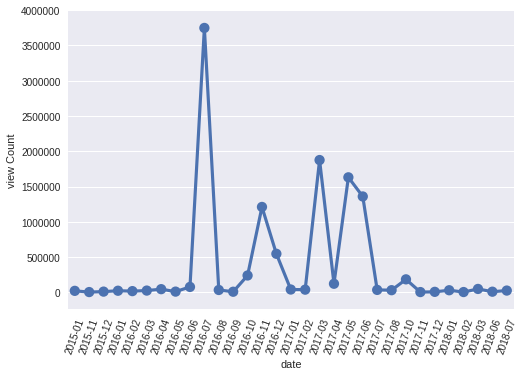

In [47]:
df['date'] = pa.to_datetime(df['date'])
df['mnth_yr'] =pa.to_datetime(df['date']).dt.to_period('m')
times=df.sort_values(by='mnth_yr',ascending=False).groupby('mnth_yr')['viewCount'].sum()
times=times.sort_index()
g=sns.pointplot(x=times.keys(),y=times.values,linestyles="-",markers='o')
g.set_xticklabels(labels=times.keys(),rotation=70,)
g.set_xlabel("date")
g.set_ylabel("view Count")

#### away from the fact that this video about "محطم تمثال صدام حسين" having very big views, we can see that at start of 2017 the channel got very good activity 

### Now i want to explore variables that might affect the views of video
#### 1-duration of video 
#### 2-title writing style

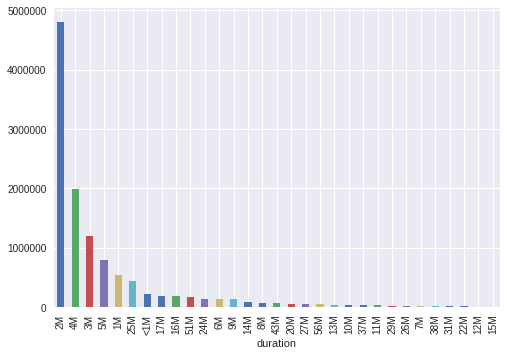

In [26]:
df.groupby('duration')['viewCount'].sum().sort_values(ascending=False).plot(kind='bar')

#### this graph shows the relation between the duration of the video and the number of views as we can see and as expected the less the duration the more views it got we see videos from range(1M~5M) got the most views

### Now lets see the title i will explore two things 
#### -first if the title start with question does that attract users to watch or not ?
#### -second if the there is an Analogy(تشبيه) in the title does that attract ?

In [36]:
def calssf_quo(text):
    words=text.split()
    if words[0] in ['كيف','هل','لماذا','من','ماذا','من','ما']:
        return "Question"
    elif re.search(r'.*\?|.*\؟',words[-1]):
        return "Question"
    else: 
        return "Not Question"

In [34]:
import re
text='فيلم "صدمة ورعب": لماذا صدّق الاعلام الامريكي تبريرات ادارة بوش الكاذبة لاجتياح العراق؟'
words=text.split()
if(re.search(r'.*\?|.*\؟',words[-1])):
    print(text)
    print('Question mark')

فيلم "صدمة ورعب": لماذا صدّق الاعلام الامريكي تبريرات ادارة بوش الكاذبة لاجتياح العراق؟
Question mark


In [37]:
df['question']=df['title'].apply(lambda x:calssf_quo(x))

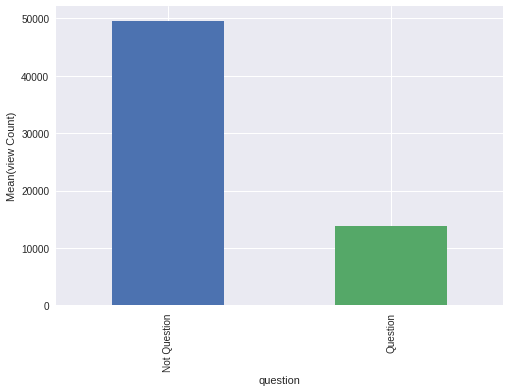

In [48]:
graph=df.groupby('question')['viewCount'].mean().plot(kind='bar')
graph.set_ylabel("Mean(view Count)")

/home/mogady/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


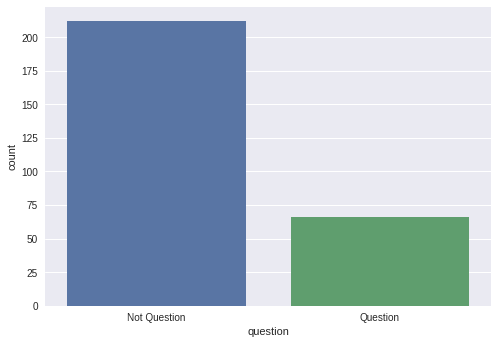

In [39]:
sns.countplot(x='question',data=df)

#### we see from the two graphs above that videos with question style dosn't improve the views count it actually  might be bad for it (user might feel boring)

In [28]:
text='فيلم "صدمة ورعب": لماذا صدّق الاعلام الامريكي تبريرات ادارة بوش الكاذبة لاجتياح العراق؟'
re.findall(r'".+"',text)

['"صدمة ورعب"']

In [29]:
df['quotations']=df['title'].apply(lambda x:re.findall(r'".+"',x))

In [30]:
df['quotations']=df['quotations'].apply(lambda x:"quo" if len(x)>0 else "no quo")

In [31]:
df

,commentCount,defaultAudioLanguage,dislikeCount,duration,favoriteCount,likeCount,tage,title,viewCount,date,time,mnth_yr,quotations
0,4,ar,3,10M,0,27,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",رئيس استوديوهات هارفيل يكشف عن التحضير لصنع في...,886,2018-07-26,07:42:44,2018-07,no quo
1,3,ar,5,10M,0,14,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",علي صوفان، عميل الأف بي آي اللبناني الاصل، يتح...,790,2018-07-23,06:07:41,2018-07,no quo
2,8,ar,6,10M,0,44,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",هل حقا أن النجم الاسباني انطونيو بانديراس ينحد...,2580,2018-07-19,12:40:12,2018-07,no quo
3,26,ar,5,9M,0,92,"['بي بي سي', 'بي بي سي عربي', 'روب راينر', 'صد...","فيلم ""صدمة ورعب"": لماذا صدّق الاعلام الامريكي ...",3027,2018-07-16,10:07:10,2018-07,quo
4,1,ar,4,10M,0,23,"['بي بي سي عربي', 'بي بي سي اخبار', 'حسام عاصي...",هل عملاء السي آي آى الذين يسربون معلومات سرية ...,760,2018-07-12,09:01:37,2018-07,no quo
5,5,ar,5,10M,0,54,"['بي بي سي', 'بي بي سي عربي', 'حسام عاصي', 'هو...",هل يمكن لاستوديوهات هوليوود أن تبقى على قيد ال...,2581,2018-07-09,05:08:55,2018-07,no quo
6,5,ar,7,10M,0,40,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",لماذا كانت 2017 الاسوأ لهوليوود والافضل للعرب ...,1972,2018-07-04,05:28:38,2018-07,no quo
7,9,ar,4,10M,0,49,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",من هم السينمائيون العرب الذين تلقوا دعوات للان...,1865,2018-07-02,06:14:14,2018-07,no quo
8,11,ar,6,10M,0,32,"['بي بي سي', 'بي بي سي عربي', 'اخبار البي بي س...",كيف تنبأ الكاتب لورنس رايت باحداث سبتمبر ١١ في...,1210,2018-06-28,06:25:53,2018-06,quo
9,1,ar,1,10M,0,5,"['بي بي سي', 'بي بي سي عربي', 'بي بي سي العربي...",لماذا فشل سولو-قصة حرب نجوم في شباك التذاكر؟,548,2018-06-26,06:31:37,2018-06,no quo


/home/mogady/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


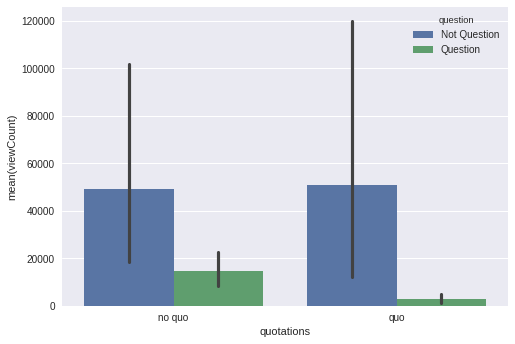

In [40]:
sns.barplot(x='quotations',y='viewCount',hue='question',data=df)

/home/mogady/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


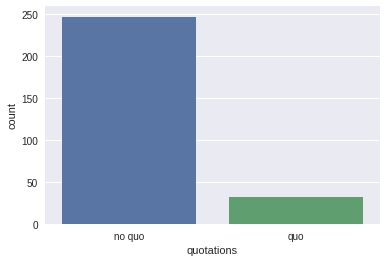

In [137]:
sns.countplot(x='quotations',data=df)

#### from the two graphs above we can see that with the low number of videos that have title with Analogy(تشبيه) it have number of views more than the title with ordinary style